In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.interpolate import interp1d
import seaborn as sns
import os
from scipy.stats import pearsonr, spearmanr
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import pickle
import datetime 
import warnings
import sys
from datetime import timedelta
warnings.simplefilter(action='ignore', category=FutureWarning)

# from ClassFunctions_OtherRes import precip_time_series, rainfall_analysis
from PlottingFunctions import *

temp_res = 60

# For each file which has a 5 minute pickle file
for pickle_str in os.listdir(f'/nfs/a319/gy17m2a/MetricEvaluation/DanishRainDataPickles/')[66:67]:
    
    if 'svk' in pickle_str:
        directory = 'DanishRainData_SVK'
    else:
        directory = 'DanishRainData'    
    
    if 'svk' not in pickle_str:
    
        all_events = []

        file_name = pickle_str.split('.pkl')[0]
        if os.path.isfile(f"/nfs/a319/gy17m2a/MetricEvaluation/DanishRainData_Outputs/{temp_res}mins/All_events_new_{file_name}"):
            print("is file")
        else:
            print("is not file")

In [182]:
all_events_5mins =[]
all_events_10mins =[]
all_events_30mins =[]
all_events_60mins =[]

total_events = 0
print(len(os.listdir("../DanishRainData_Outputs/5mins/")))

for num, file in enumerate(os.listdir("../DanishRainData_Outputs/5mins/")):
    # Get 5 mintue data
    df_5m = pd.read_csv(f"../DanishRainData_Outputs/5mins/{file}")
    df_5m['event_num']=df_5m.index
    # Get rid of the trailing strings sometimes on the gauge_num
    df_5m['gauge_num'] = df_5m['gauge_num'].apply(
        lambda x: int(x.split('_')[0]) if isinstance(x, str) and x.split('_')[0].isdigit() else x)
    
    # Get other resolution data
    df_10m = pd.read_csv(f"../DanishRainData_Outputs/{10}mins/{file}")
    df_30m = pd.read_csv(f"../DanishRainData_Outputs/{30}mins/{file}")
    df_60m = pd.read_csv(f"../DanishRainData_Outputs/{60}mins/{file}")
    
   # Find common event numbers in all four
    common_event_nums = (
        set(df_5m['event_num']) &
        set(df_10m['event_num']) &
        set(df_30m['event_num']) &
        set(df_60m['event_num']))

    # Filter all DataFrames to only include common events
    df_5m = df_5m[df_5m['event_num'].isin(common_event_nums)].reset_index(drop=True)
    df_10m = df_10m[df_10m['event_num'].isin(common_event_nums)].reset_index(drop=True)
    df_30m = df_30m[df_30m['event_num'].isin(common_event_nums)].reset_index(drop=True)
    df_60m = df_60m[df_60m['event_num'].isin(common_event_nums)].reset_index(drop=True)
    
    total_events = total_events + len(common_event_nums)
    print(f"{num} : {file}: {len(common_event_nums)} events retained across all resolutions, new total: {total_events}")    
    
    # Collect DataFrames into a dictionary for easy iteration
    dfs = {'5m': df_5m,
        '10m': df_10m,
        '30m': df_30m,
        '60m': df_60m}
    
#     # Check the start and end times align
#     for i in range(len(df_5m)):
#         reference_start = pd.to_datetime(df_5m.iloc[i]['start_time'])
#         reference_end = pd.to_datetime(df_5m.iloc[i]['end_time'])
#         # print(reference_start,reference_end)
#         for res, df in dfs.items():
#             start = pd.to_datetime(df.iloc[i]['start_time'])
#             end = pd.to_datetime(df.iloc[i]['end_time'])
#             #print(res, start, end)

#             delta_start = abs(start - reference_start)
#             delta_end = abs(end - reference_end)

#             if delta_start > timedelta(minutes=60):
#                 print(f"⚠️ START mismatch in {res} at index {i}")
#                 print(f"   {res} start: {start}, 5m start: {reference_start}, Δ: {delta_start}")

#             if delta_end > timedelta(minutes=60):
#                 print(f"⚠️ END mismatch in {res} at index {i}")
#                 print(f"   {res} end: {end}, 5m end: {reference_end}, Δ: {delta_end}")

    all_events_5mins.append(df_5m)
    all_events_10mins.append(df_10m)             
    all_events_30mins.append(df_30m)
    all_events_60mins.append(df_60m)            

# all_events_df_5mins = pd.concat(all_events_5mins)   
# all_events_df_30mins = pd.concat(all_events_30mins)   
# print(len(all_events_df_5mins), len(all_events_df_30mins))
# all_events_df_30mins.reset_index(inplace=True,drop=True)

346
0 : All_events_5413_svk_precip_minute.csv: 172 events retained across all resolutions, new total: 172
1 : All_events_610400_precip_minute.csv: 859 events retained across all resolutions, new total: 1031
2 : All_events_598120_precip_minute.csv: 136 events retained across all resolutions, new total: 1167
3 : All_events_5411_svk_precip_minute.csv: 1124 events retained across all resolutions, new total: 2291
4 : All_events_588920_precip_minute.csv: 816 events retained across all resolutions, new total: 3107
5 : All_events_5555_svk_precip_minute.csv: 971 events retained across all resolutions, new total: 4078
6 : All_events_5653_svk_precip_minute.csv: 447 events retained across all resolutions, new total: 4525
7 : All_events_5052_svk_precip_minute.csv: 2423 events retained across all resolutions, new total: 6948
8 : All_events_5990_svk_precip_minute.csv: 2107 events retained across all resolutions, new total: 9055
9 : All_events_611900_precip_minute.csv: 521 events retained across all r

79 : All_events_540620_precip_minute.csv: 652 events retained across all resolutions, new total: 78460
80 : All_events_5058_svk_precip_minute.csv: 1966 events retained across all resolutions, new total: 80426
81 : All_events_5750_svk_precip_minute.csv: 2608 events retained across all resolutions, new total: 83034
82 : All_events_5602_svk_precip_minute.csv: 677 events retained across all resolutions, new total: 83711
83 : All_events_5585_svk_precip_minute.csv: 1180 events retained across all resolutions, new total: 84891
84 : All_events_5504_svk_precip_minute.csv: 20 events retained across all resolutions, new total: 84911
85 : All_events_5588_svk_precip_minute.csv: 40 events retained across all resolutions, new total: 84951
86 : All_events_545020_precip_minute.csv: 694 events retained across all resolutions, new total: 85645
87 : All_events_5257_svk_precip_minute.csv: 1149 events retained across all resolutions, new total: 86794
88 : All_events_520520_precip_minute.csv: 971 events reta

160 : All_events_5245_svk_precip_minute.csv: 1140 events retained across all resolutions, new total: 168852
161 : All_events_605200_precip_minute.csv: 740 events retained across all resolutions, new total: 169592
162 : All_events_5122_svk_precip_minute.csv: 1521 events retained across all resolutions, new total: 171113
163 : All_events_5573_svk_precip_minute.csv: 257 events retained across all resolutions, new total: 171370
164 : All_events_5698_svk_precip_minute.csv: 497 events retained across all resolutions, new total: 171867
165 : All_events_5542_svk_precip_minute.csv: 22 events retained across all resolutions, new total: 171889
166 : All_events_5495_svk_precip_minute.csv: 654 events retained across all resolutions, new total: 172543
167 : All_events_549920_precip_minute.csv: 929 events retained across all resolutions, new total: 173472
168 : All_events_500520_precip_minute.csv: 986 events retained across all resolutions, new total: 174458
169 : All_events_5012_svk_precip_minute.cs

237 : All_events_5515_svk_precip_minute.csv: 1500 events retained across all resolutions, new total: 242690
238 : All_events_5190_svk_precip_minute.csv: 1436 events retained across all resolutions, new total: 244126
239 : All_events_618000_precip_minute.csv: 848 events retained across all resolutions, new total: 244974
240 : All_events_5490_svk_precip_minute.csv: 1907 events retained across all resolutions, new total: 246881
241 : All_events_5765_svk_precip_minute.csv: 2764 events retained across all resolutions, new total: 249645
242 : All_events_5713_svk_precip_minute.csv: 453 events retained across all resolutions, new total: 250098
243 : All_events_5824_svk_precip_minute.csv: 544 events retained across all resolutions, new total: 250642
244 : All_events_5855_svk_precip_minute.csv: 1156 events retained across all resolutions, new total: 251798
245 : All_events_599420_precip_minute.csv: 846 events retained across all resolutions, new total: 252644
246 : All_events_5501_svk_precip_min

314 : All_events_5243_svk_precip_minute.csv: 2164 events retained across all resolutions, new total: 331016
315 : All_events_5162_svk_precip_minute.csv: 259 events retained across all resolutions, new total: 331275
316 : All_events_608200_precip_minute.csv: 97 events retained across all resolutions, new total: 331372
317 : All_events_5649_svk_precip_minute.csv: 1133 events retained across all resolutions, new total: 332505
318 : All_events_5721_svk_precip_minute.csv: 643 events retained across all resolutions, new total: 333148
319 : All_events_513520_precip_minute.csv: 933 events retained across all resolutions, new total: 334081
320 : All_events_5412_svk_precip_minute.csv: 301 events retained across all resolutions, new total: 334382
321 : All_events_618400_precip_minute.csv: 89 events retained across all resolutions, new total: 334471
322 : All_events_5835_svk_precip_minute.csv: 1111 events retained across all resolutions, new total: 335582
323 : All_events_529520_precip_minute.csv:

In [239]:
all_events_df_5mins = pd.concat(all_events_5mins)   
all_events_df_10mins = pd.concat(all_events_10mins)   
all_events_df_30mins = pd.concat(all_events_30mins)
all_events_df_60mins = pd.concat(all_events_60mins)   

for df in [all_events_df_5mins, all_events_df_10mins, all_events_df_30mins, all_events_df_60mins]:
    df.reset_index(drop=True, inplace=True)
    
print(len(all_events_df_5mins), len(all_events_df_10mins), len(all_events_df_30mins), len(all_events_df_60mins))

364247 364247 364247 364247


### Sense check on event lengths

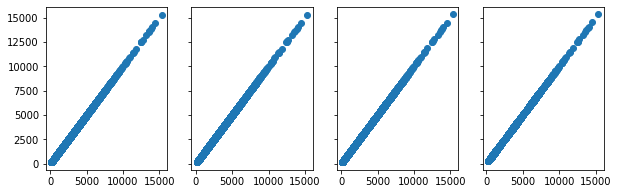

In [96]:
metric = 'duration'
fig, axs=plt.subplots(ncols=4, figsize=(10,3), sharey=True)
axs[0].scatter(all_events_df_5mins_raw[metric], all_events_df_5mins_raw[metric])
axs[1].scatter(all_events_df_10mins_raw[metric], all_events_df_10mins_raw[metric])
axs[2].scatter(all_events_df_30mins_raw[metric], all_events_df_30mins_raw[metric])
axs[3].scatter(all_events_df_60mins_raw[metric], all_events_df_60mins_raw[metric]);

### --------- 

### Remove rows with unrealistically high precip

In [240]:
bad_indices = all_events_df_5mins.sort_values(by="total_precip", ascending=False)[:15].index

# Drop rows at these indices from all dataframes
all_events_df_5mins = all_events_df_5mins.drop(index=bad_indices)
all_events_df_10mins = all_events_df_10mins.drop(index=bad_indices)
all_events_df_30mins = all_events_df_30mins.drop(index=bad_indices)
all_events_df_60mins = all_events_df_60mins.drop(index=bad_indices)

for df in [all_events_df_5mins, all_events_df_10mins, all_events_df_30mins, all_events_df_60mins]:
    df.reset_index(drop=True, inplace=True)
    
print(len(all_events_df_5mins), len(all_events_df_10mins), len(all_events_df_30mins), len(all_events_df_60mins))

364232 364232 364232 364232


### Specify just raw columns to keep

In [242]:
raw_cols = []
for col in all_events_df_5mins.columns:
    if not col.endswith('_DMC_10') and not col.endswith('dblnorm'):
        raw_cols.append(col)

### Also remove 'frac_q1', 'frac_q2', 'frac_q3', 'frac_q4'
Because these bring lots of nans (with current calculation method)

In [243]:
cols_to_del = ['frac_q1', 'frac_q2', 'frac_q3', 'frac_q4']
more_cols_to_del = ['gauge_num',  'start_time', 'end_time','total_precip',  'peak_mean_ratio_scaled']

raw_cols = [x for x in raw_cols if x not in cols_to_del]  
raw_cols = [x for x in raw_cols if x not in more_cols_to_del]      

### Do the actual deleting

In [244]:
all_events_df_5mins_raw = all_events_df_5mins[raw_cols]
all_events_df_10mins_raw = all_events_df_10mins[raw_cols]
all_events_df_30mins_raw = all_events_df_30mins[raw_cols]
all_events_df_60mins_raw = all_events_df_60mins[raw_cols]

### Remove events which have NaNs for some metrics

In [245]:
# Find columns with nan for 60 mins
columns_with_nan = all_events_df_60mins_raw.columns[all_events_df_60mins_raw.isnull().any()].tolist()
print("Columns with at least one NaN value:")
print(columns_with_nan)

Columns with at least one NaN value:
['asymm_d', 'event_loading_ghanghas', 'lorentz_asymetry', 'mean_intensity_high_intensity_zone']


In [246]:
# Find indices of rows with any NaNs in the 60-minute data
bad_indices = all_events_df_60mins_raw[all_events_df_60mins_raw.isnull().any(axis=1)].index

# Drop rows at these indices from all dataframes
all_events_df_5mins_raw = all_events_df_5mins_raw.drop(index=bad_indices)
all_events_df_10mins_raw = all_events_df_10mins_raw.drop(index=bad_indices)
all_events_df_30mins_raw = all_events_df_30mins_raw.drop(index=bad_indices)
all_events_df_60mins_raw = all_events_df_60mins_raw.drop(index=bad_indices)

for df in [all_events_df_5mins_raw, all_events_df_10mins_raw, all_events_df_30mins_raw, all_events_df_60mins_raw]:
    del df['event_num']
    df.reset_index(drop=True, inplace=True)

# Recheck for NANS
columns_with_nan = all_events_df_60mins_raw.columns[all_events_df_60mins_raw.isnull().any()].tolist()
print("Columns with at least one NaN value:")
print(columns_with_nan)

print(len(all_events_df_5mins_raw), len(all_events_df_10mins_raw), len(all_events_df_30mins_raw), len(all_events_df_60mins_raw))

Columns with at least one NaN value:
[]
364227 364227 364227 364227


In [36]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

### Find errors

In [189]:
# Dictionary of resolution labels and their corresponding DataFrames
res_dfs = {
    '10m': all_events_df_10mins_raw,
    '30m': all_events_df_30mins_raw,
    '60m': all_events_df_60mins_raw
}

# List to store result rows
results = []

# Loop through each metric
for metric in all_events_df_10mins_raw.columns:
    row = {'Metric': metric}
    y_true = all_events_df_5mins_raw[metric]

    # Add means
    row['Mean_5m'] = y_true.mean()
    for res_label in ['10m', '30m', '60m']:
        row[f'Mean_{res_label}'] = res_dfs[res_label][metric].mean()

    # Add MAEs
    for res_label in ['10m', '30m', '60m']:
        row[f'MAE_{res_label}'] = mean_absolute_error(y_true, res_dfs[res_label][metric])

    # Add MAPEs
    for res_label in ['10m', '30m', '60m']:
        row[f'MAPE_{res_label}'] = mean_absolute_percentage_error(y_true, res_dfs[res_label][metric])

    # Add RMSEs
    for res_label in ['10m', '30m', '60m']:
        row[f'RMSE_{res_label}'] = np.sqrt(mean_squared_error(y_true, res_dfs[res_label][metric]))

    # Add KS statistics
    for res_label in ['10m', '30m', '60m']:
        ks_statistic, pvalue = ks_2samp(y_true, res_dfs[res_label][metric])
        row[f'KS_{res_label}'] = ks_statistic
        row[f'KS_pvalue_{res_label}'] = pvalue

    results.append(row)

# Create the final DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.applymap(lambda x: np.nan if isinstance(x, (int, float)) and x > 1000 else x)

In [258]:
results_df.to_csv("results_df.csv", index=False)

### Plot results

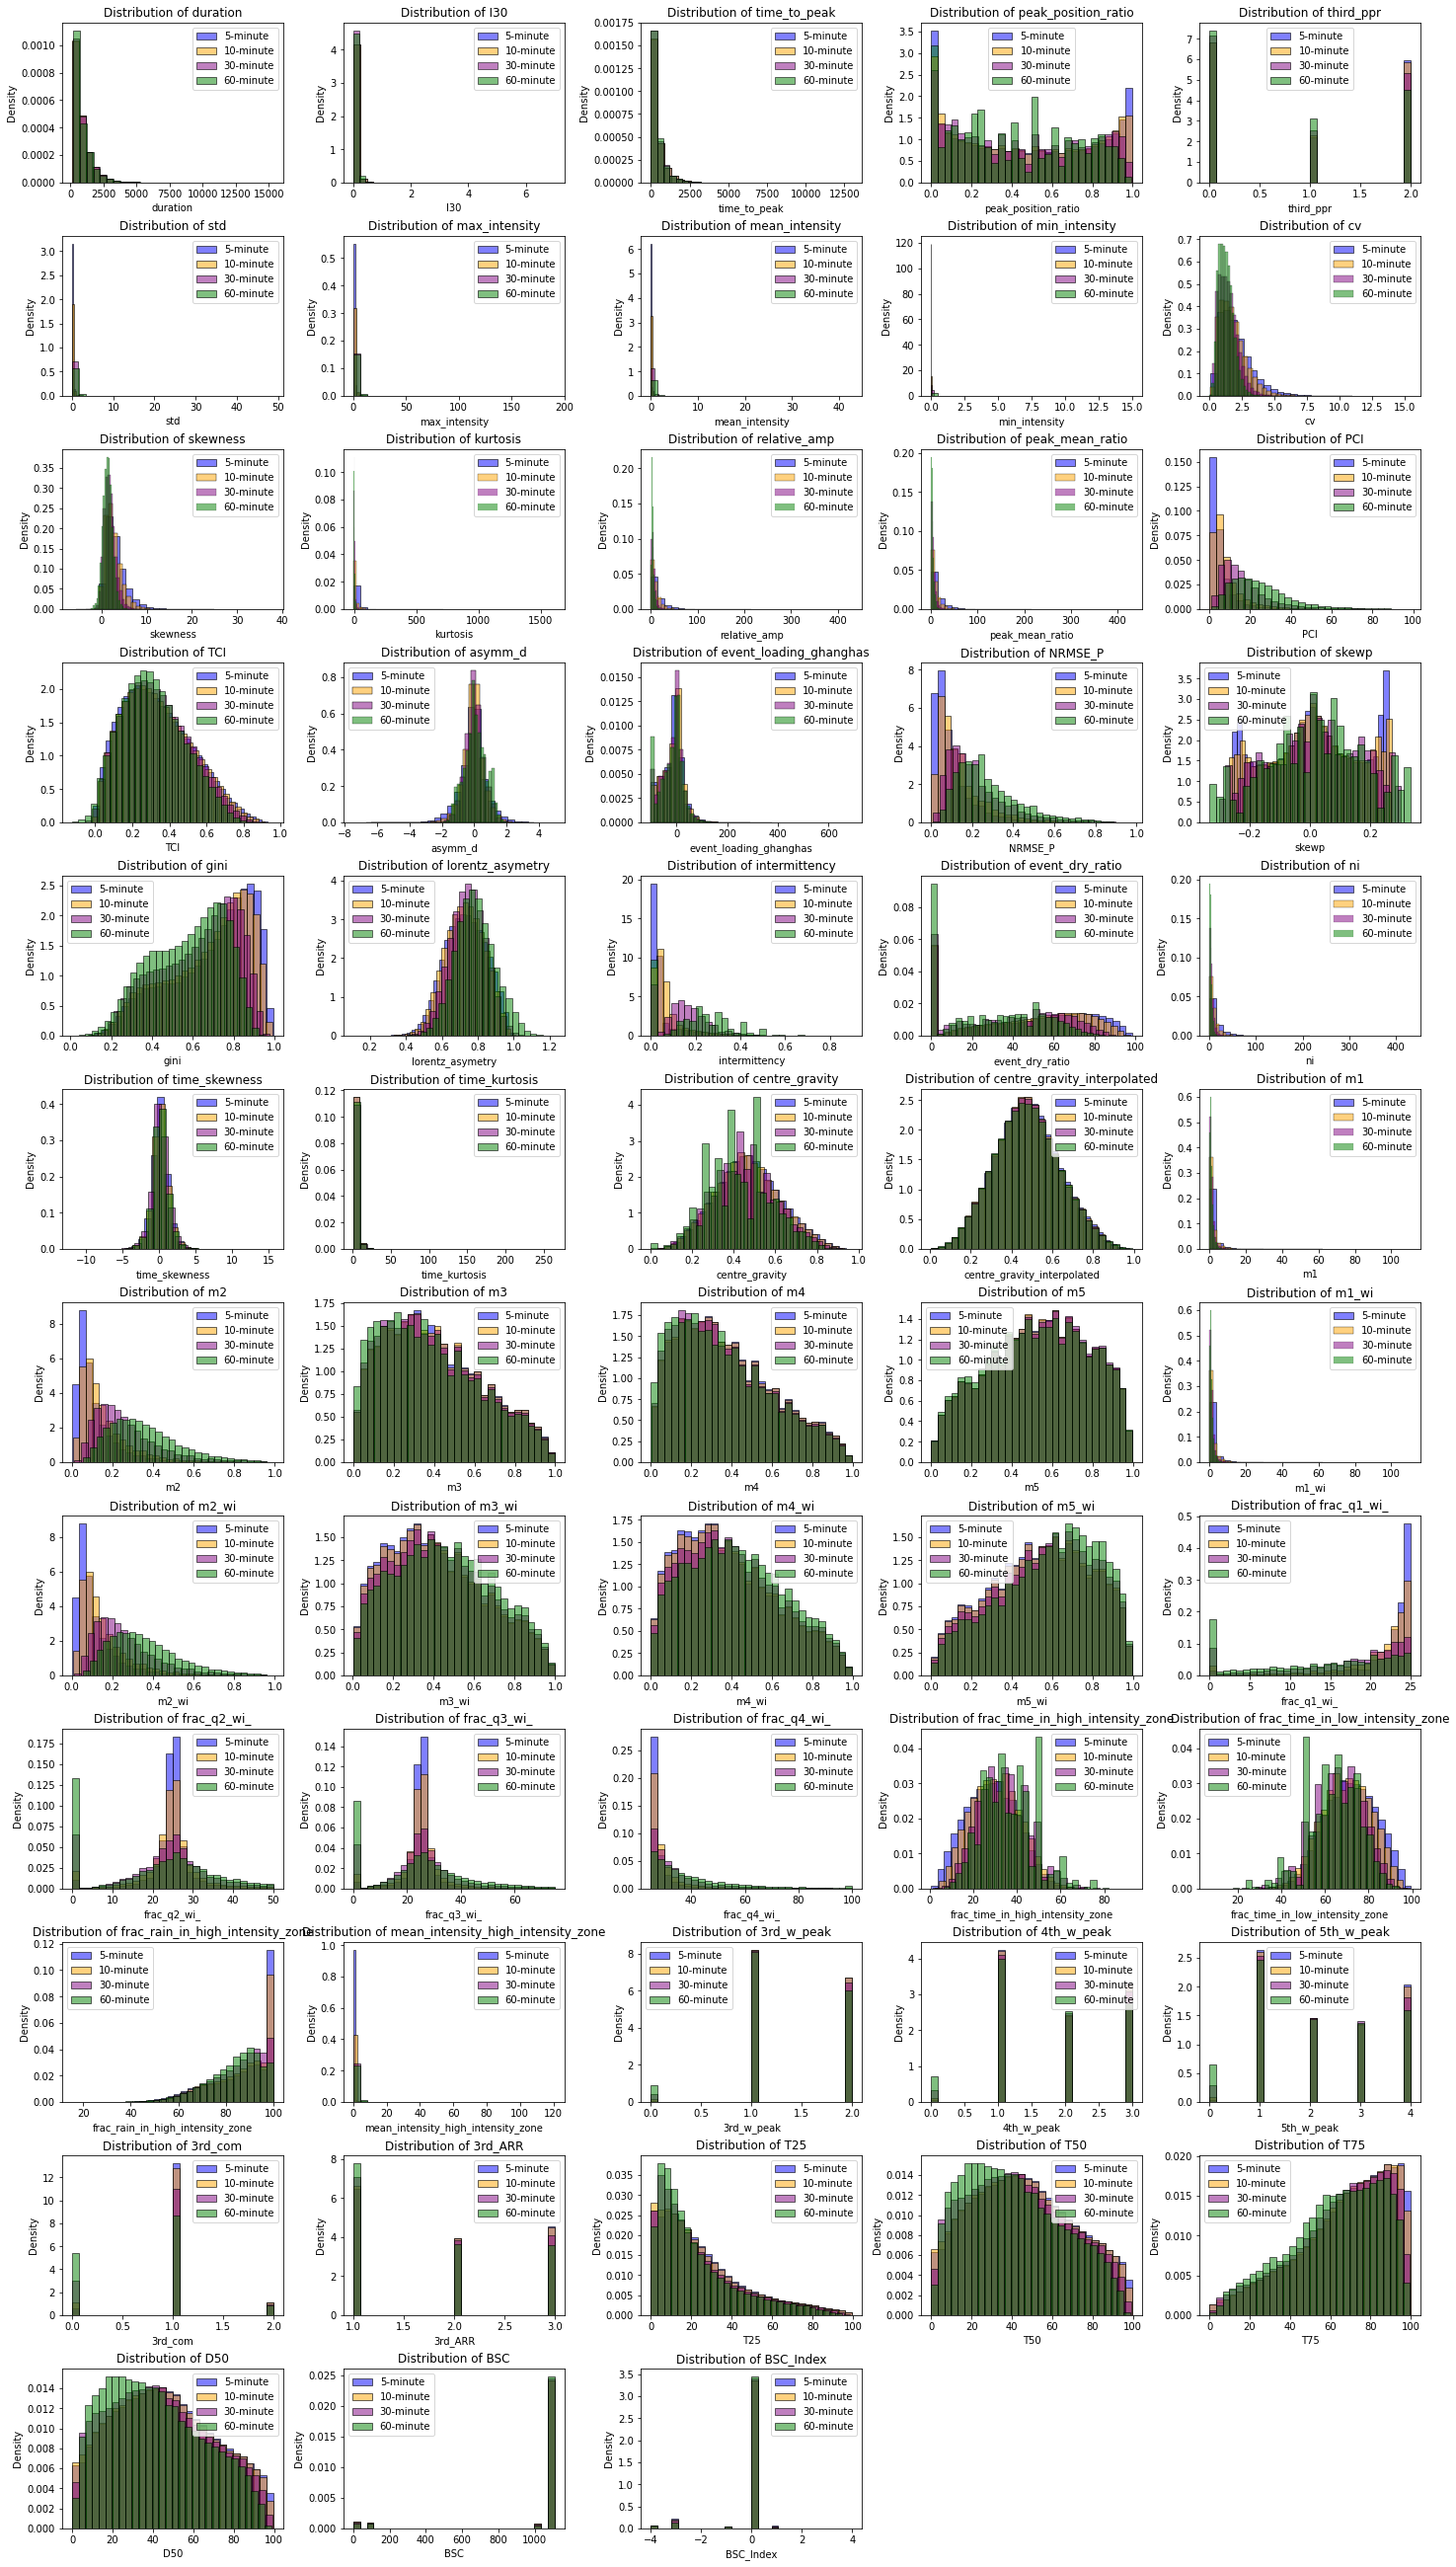

In [265]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

bins = 30

# Define the metrics and resolutions
metrics = all_events_df_5mins_raw.columns
resolutions = {
    '5-minute': (all_events_df_5mins_raw, 'blue'),
    '10-minute': (all_events_df_10mins_raw, 'orange'),
    '30-minute': (all_events_df_30mins_raw, 'purple'),
    '60-minute': (all_events_df_60mins_raw, 'green'),
}

# Set up subplot grid
n_cols = 5
n_rows = int(np.ceil(len(metrics) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 3), constrained_layout=True)
axes = axes.flatten()

# Plot distributions
for idx, metric in enumerate(metrics):
    ax = axes[idx]
    
    for label, (df, color) in resolutions.items():
        sns.histplot(
            data=df[metric],
            stat='density',
            bins=bins,
            alpha=0.5,
            color=color,
            label=label,
            ax=ax
        )
    
    ax.set_title(f'Distribution of {metric}')
    ax.set_xlabel(metric)
    ax.set_ylabel('Density')
    ax.legend()

# Remove unused subplots
for idx in range(len(metrics), len(axes)):
    fig.delaxes(axes[idx])

fig.savefig('Histograms.png', facecolor='white', edgecolor='white')

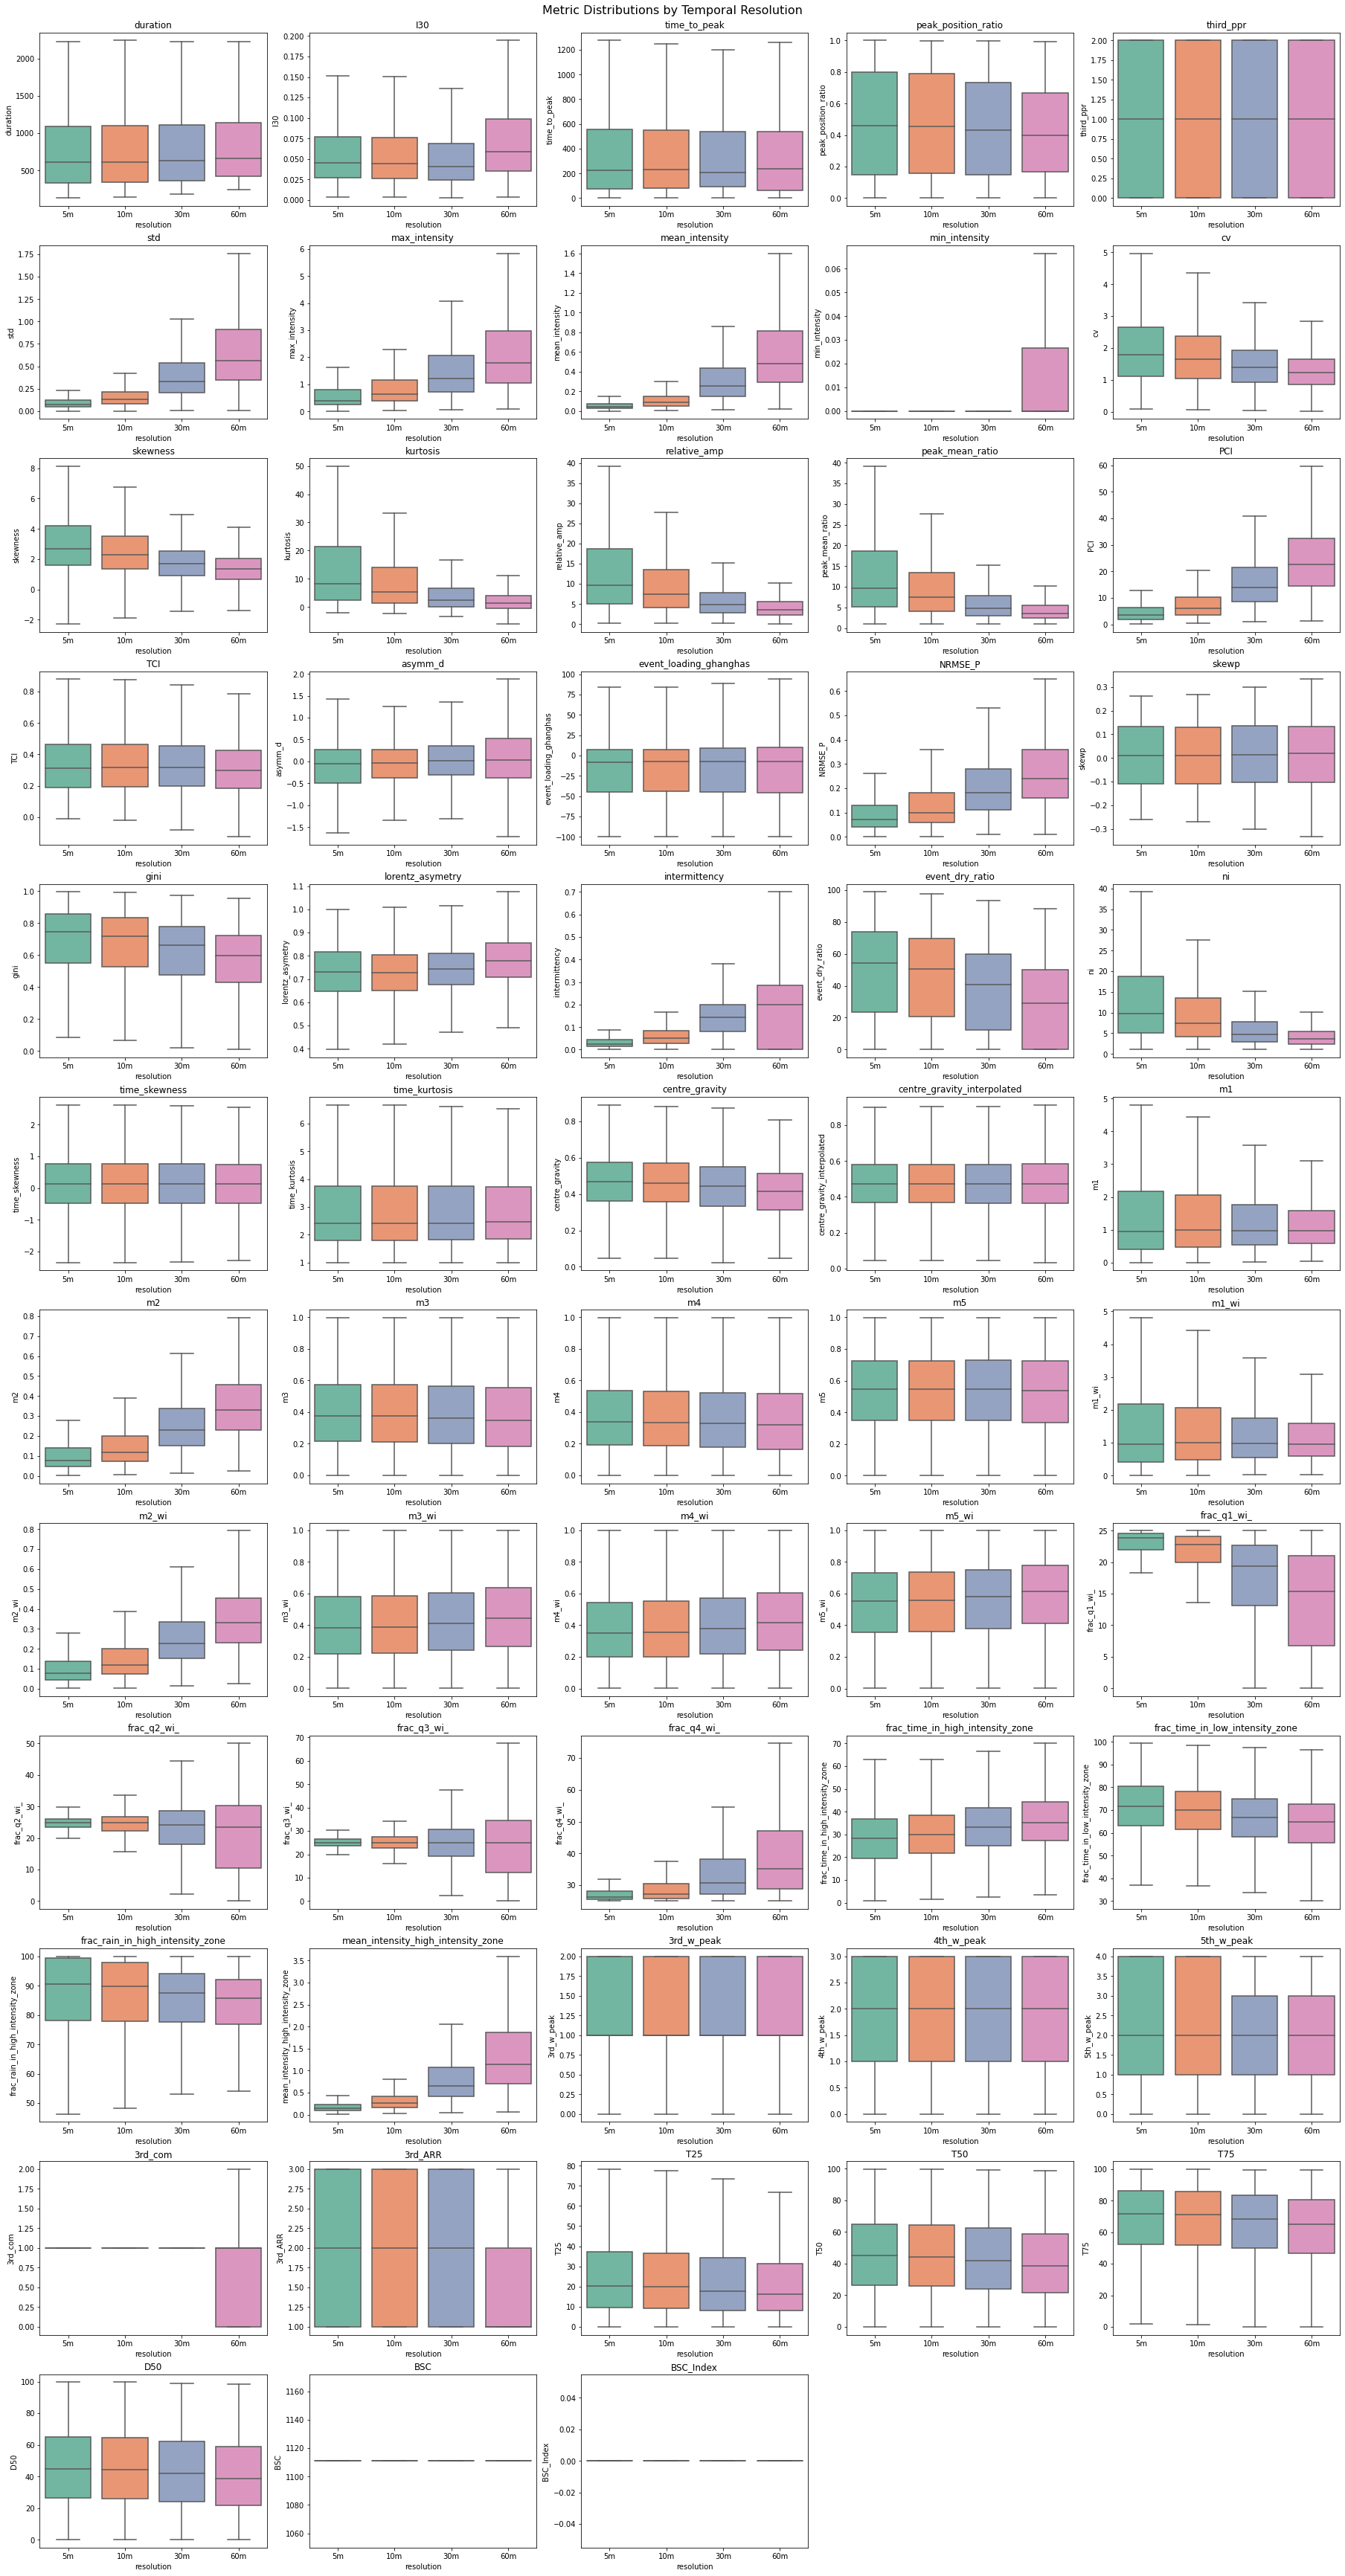

In [266]:
# Combine all data into one DataFrame for easy plotting
res_dfs = {
    '5m': all_events_df_5mins_raw,
    '10m': all_events_df_10mins_raw,
    '30m': all_events_df_30mins_raw,
    '60m': all_events_df_60mins_raw
}

combined_data = []
for res, df in res_dfs.items():
    temp_df = df.copy()
    temp_df['resolution'] = res
    combined_data.append(temp_df)

df_long = pd.concat(combined_data)

# Plot boxplots or violin plots
n_cols = 5
n_rows = int(np.ceil(len(all_events_df_5mins_raw.columns) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4), constrained_layout=True)

for i, metric in enumerate(all_events_df_5mins_raw.columns):
    ax = axes.flatten()[i]
    sns.boxplot(data=df_long, x='resolution', y=metric, ax=ax, palette='Set2', showfliers=False)
    ax.set_title(metric)

# Remove any unused subplots
for j in range(len(all_events_df_5mins_raw.columns), len(axes.flatten())):
    fig.delaxes(axes.flatten()[j])

plt.suptitle("Metric Distributions by Temporal Resolution", fontsize=16)

fig.savefig('Boxplots.png', facecolor='white', edgecolor='white')


/nfs/a321/gy17m2a/anaconda_install/anaconda3/envs/ukcp18/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  # This is added back by InteractiveShellApp.init_path()
/nfs/a321/gy17m2a/anaconda_install/anaconda3/envs/ukcp18/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  # This is added back by InteractiveShellApp.init_path()
/nfs/a321/gy17m2a/anaconda_install/anaconda3/envs/ukcp18/lib/python3.7/site-packages/IPython/core/events.py:89: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  func(*args, **kwargs)
/nfs/a321/gy17m2a/anaconda_install/anaconda3/envs/ukcp18/lib/python3.7/site-packages/IPython/core/events.py:89: Use

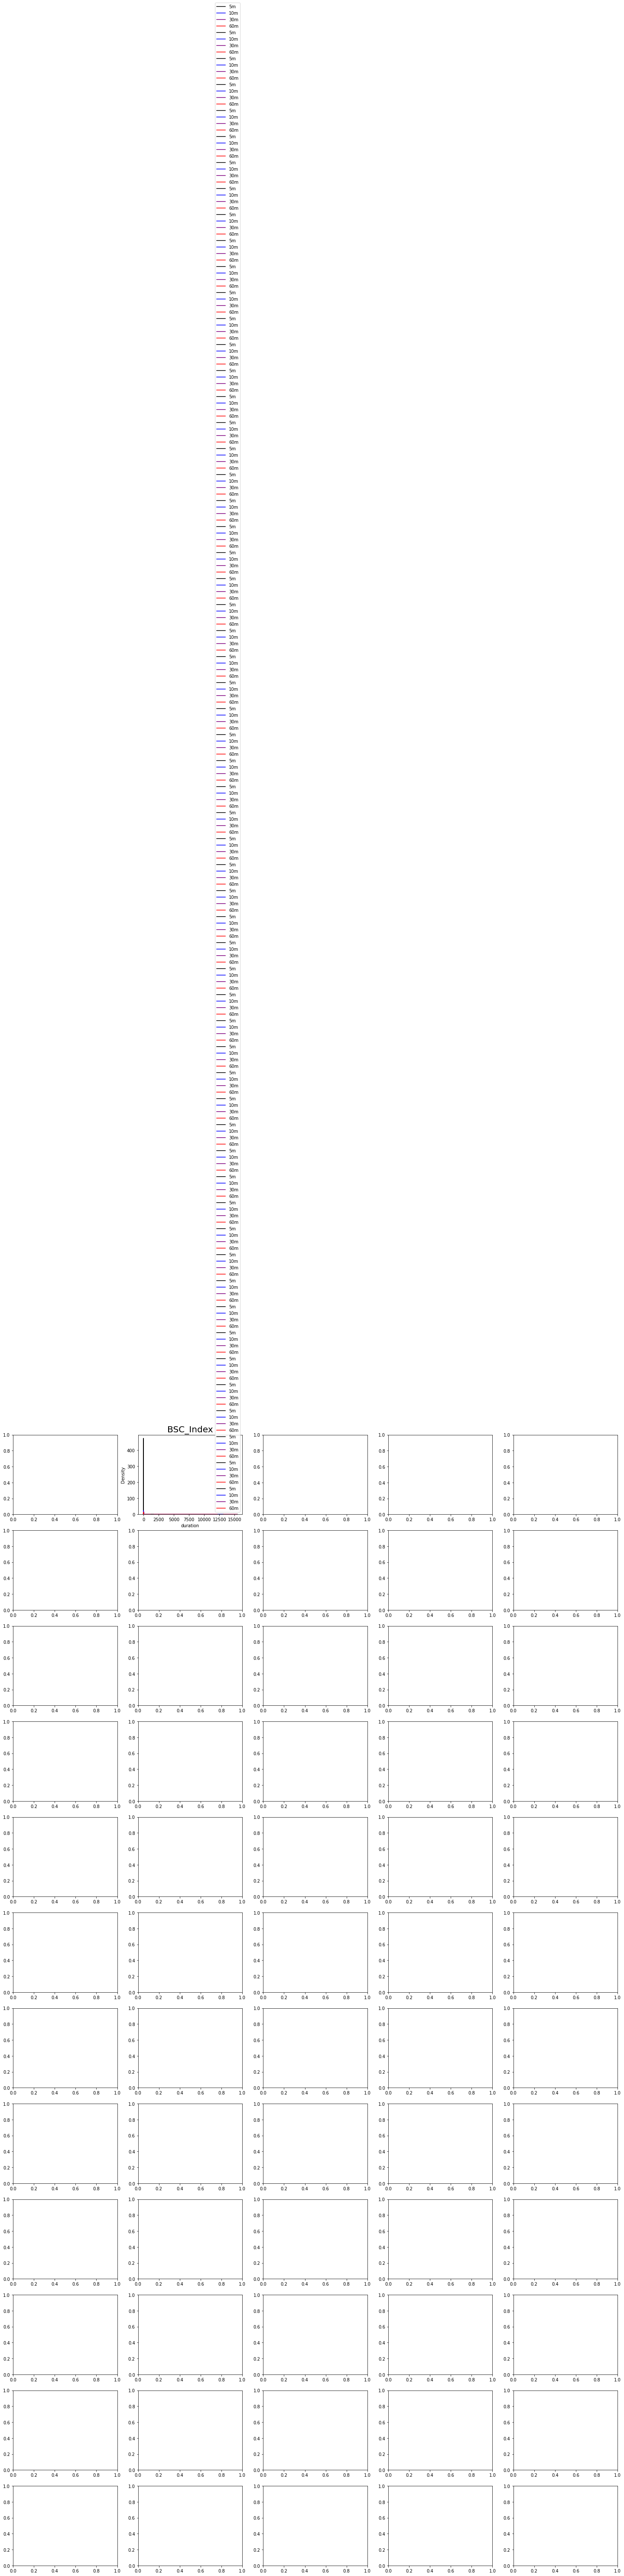

In [291]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4), constrained_layout=True)

for num, metric in enumerate(all_events_df_5mins_raw.columns):
    ax = axes.flatten()[i]
    ax.set_title(metric, fontsize=20)
    sns.kdeplot(ax=ax, data=all_events_df_5mins_raw[metric], fill=False, bw_adjust=1, color = 'black', label = '5m')
    sns.kdeplot(ax=ax, data=all_events_df_10mins_raw[metric], fill=False, bw_adjust=0.5, color='blue', label = '10m')
    sns.kdeplot(ax=ax, data=all_events_df_30mins_raw[metric], fill=False, bw_adjust=0.5, color='purple', label='30m')
    sns.kdeplot(ax=ax, data=all_events_df_30mins_raw[metric], fill=False, bw_adjust=0.5, color='red', label='60m')
    ax.legend()
fig.savefig('Boxplots.png', facecolor='white', edgecolor='white')    

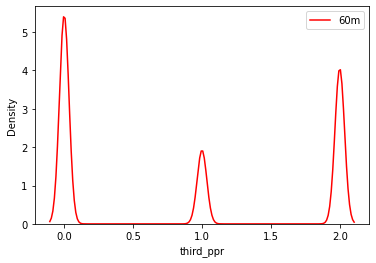

In [295]:
sns.kdeplot(data=all_events_df_30mins_raw[metric], fill=False, bw_adjust=0.5, color='red', label='60m', legend=True)
plt.legend()

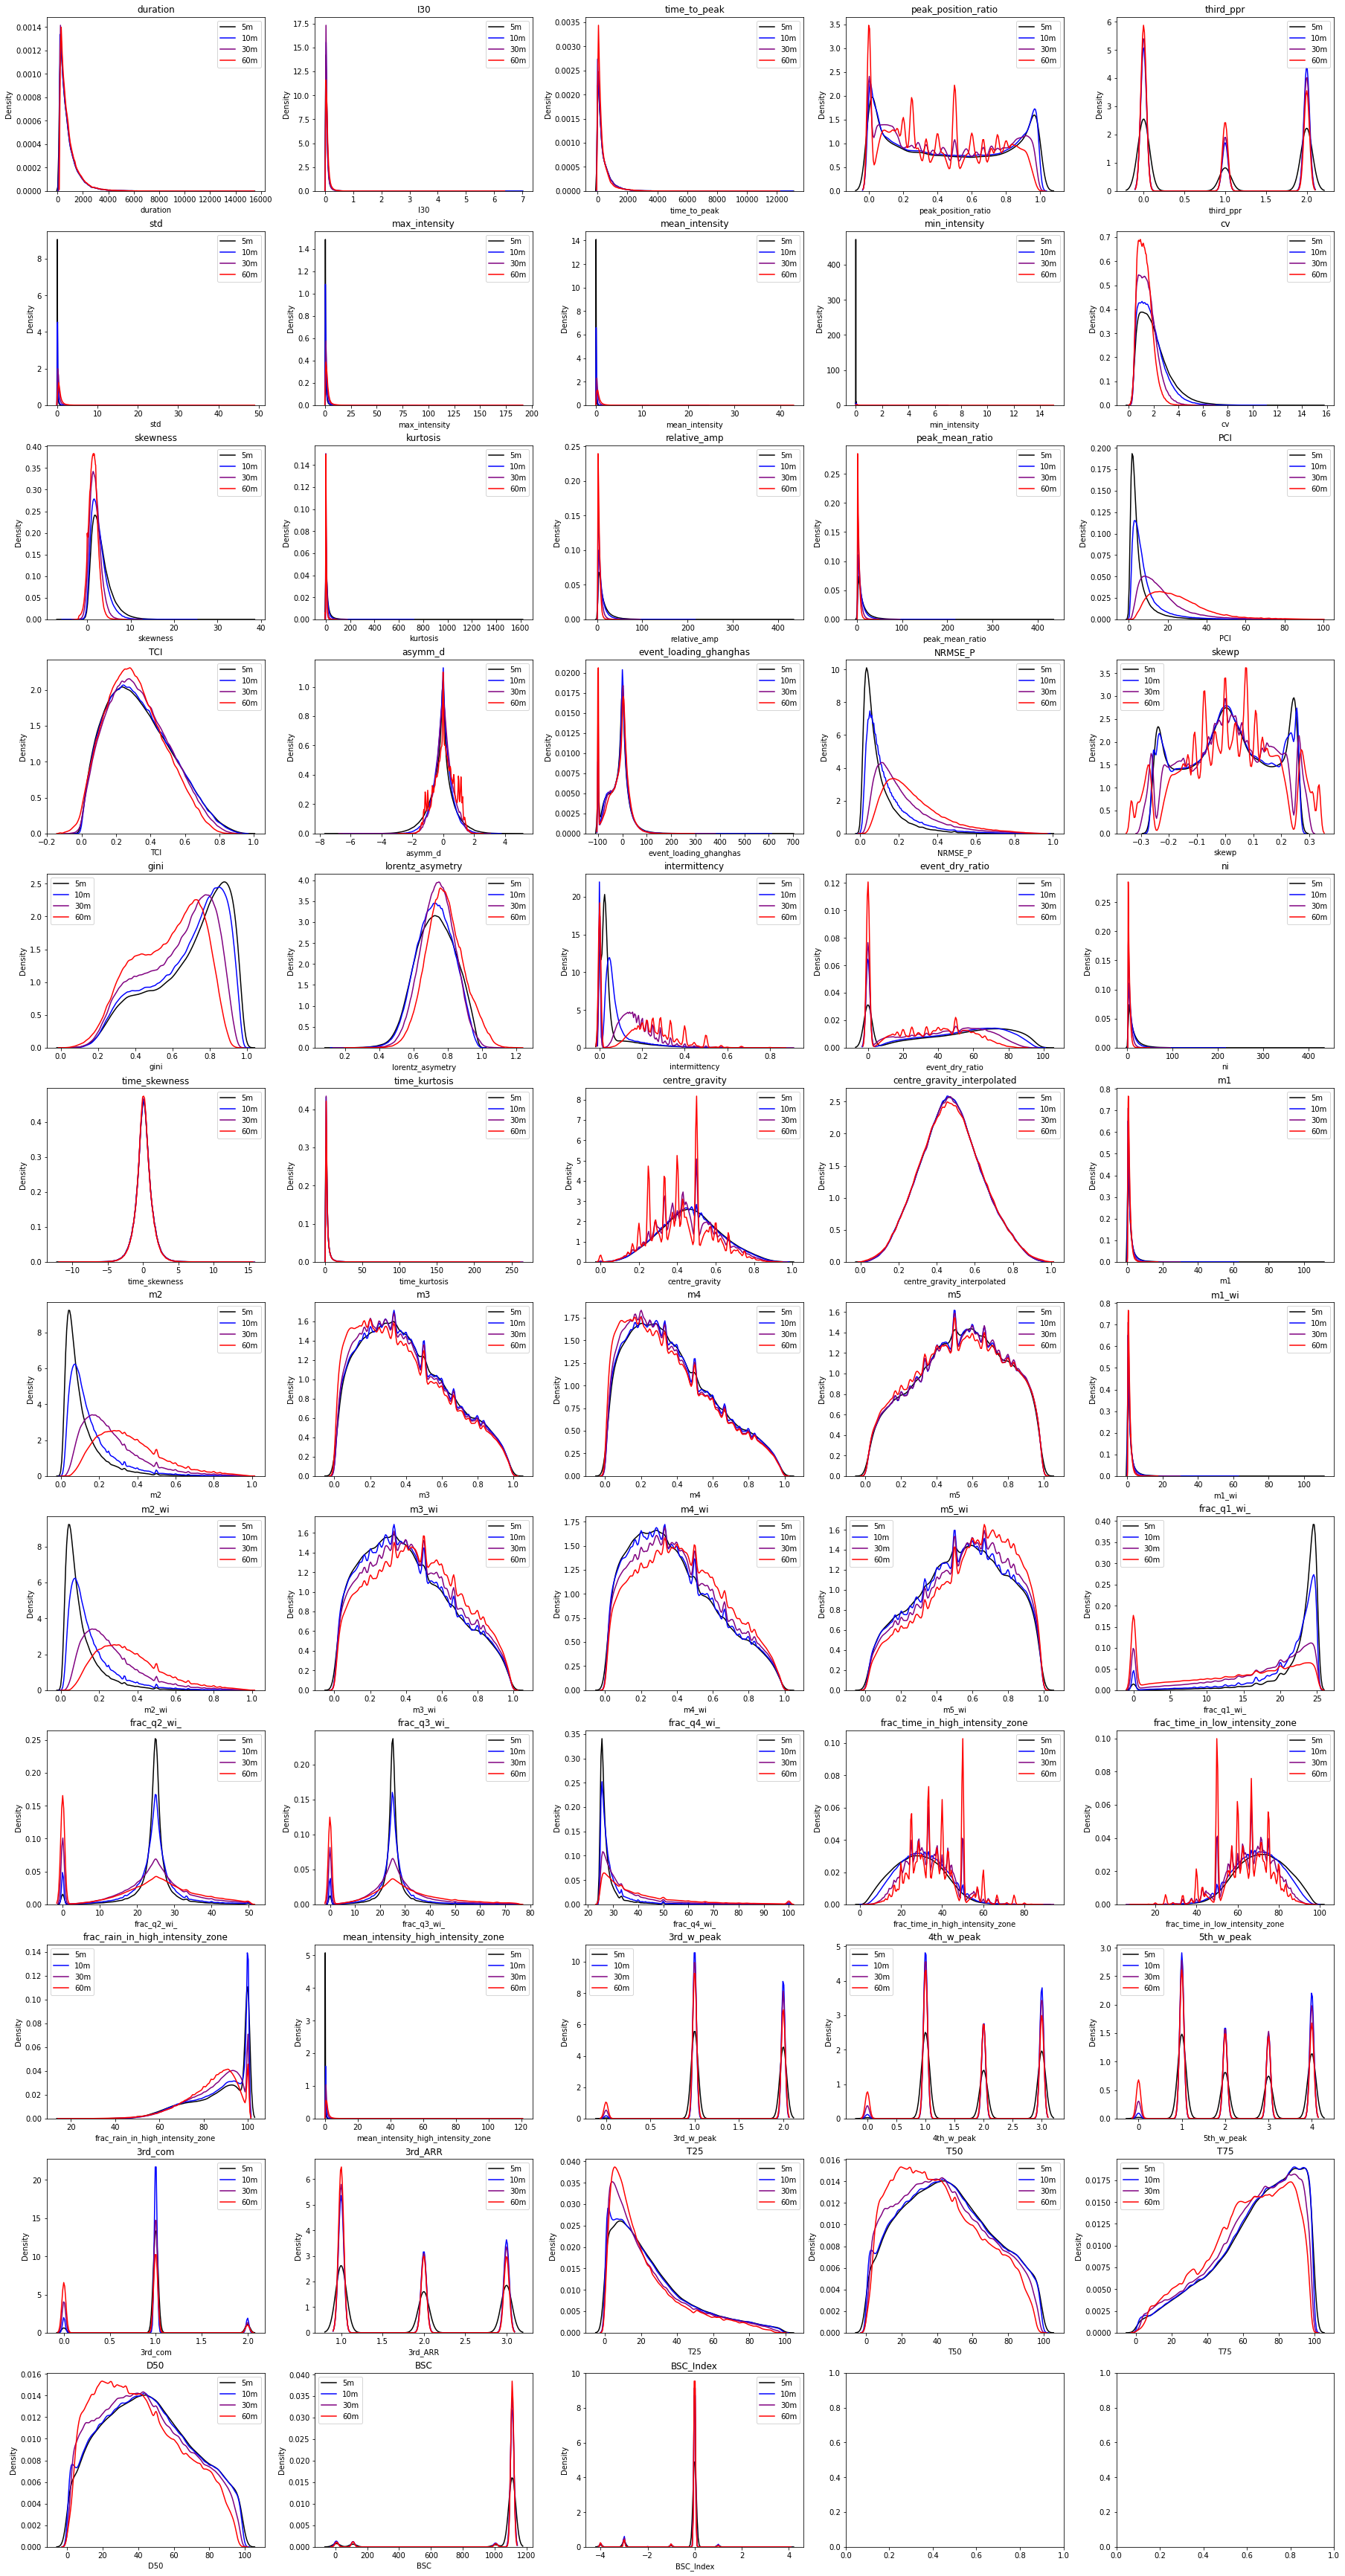

In [298]:
n_cols = 5
n_rows = int(np.ceil(len(all_events_df_5mins_raw.columns) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4), constrained_layout=True)

for i, metric in enumerate(all_events_df_5mins_raw.columns):
    ax = axes.flatten()[i]
    ax.set_title(metric)
    
    # Plot the KDEs for different time resolutions
    sns.kdeplot(ax=ax, data=all_events_df_5mins_raw[metric], fill=False, bw_adjust=1, color='black', label='5m')
    sns.kdeplot(ax=ax, data=all_events_df_10mins_raw[metric], fill=False, bw_adjust=0.5, color='blue', label='10m')
    sns.kdeplot(ax=ax, data=all_events_df_30mins_raw[metric], fill=False, bw_adjust=0.5, color='purple', label='30m')
    sns.kdeplot(ax=ax, data=all_events_df_60mins_raw[metric], fill=False, bw_adjust=0.5, color='red', label='60m')

    # Add the legend only for each subplot (ax.legend)
    ax.legend()

# Display the plot
fig.savefig('KDE_Boxplots.png', facecolor='white', edgecolor='white')


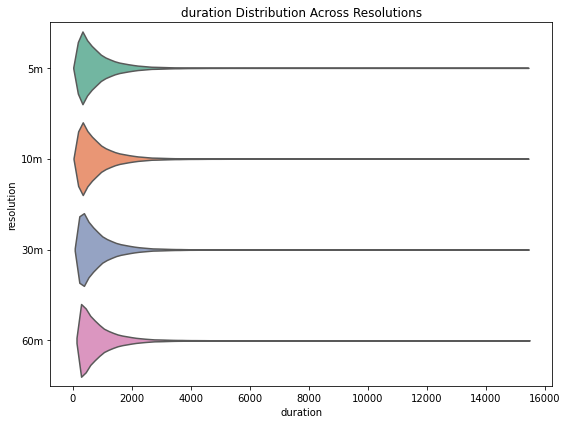

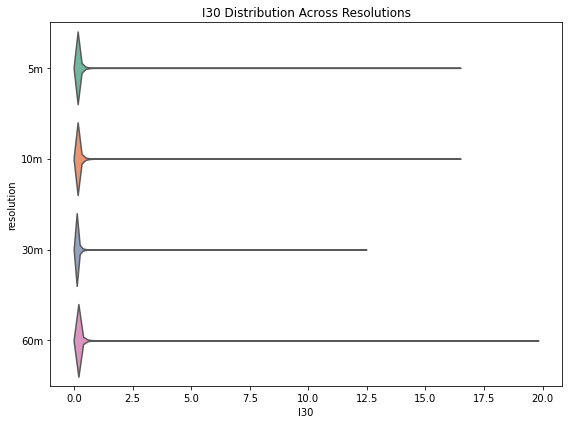

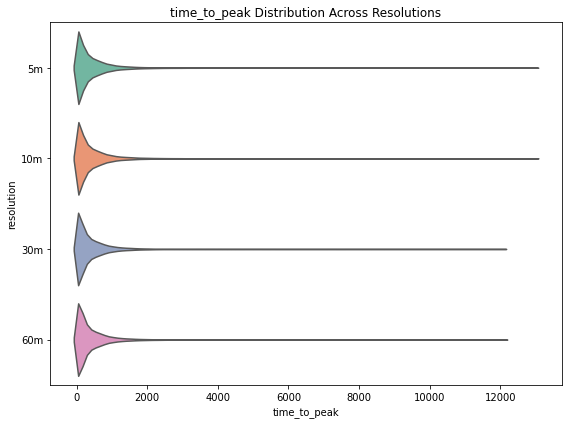

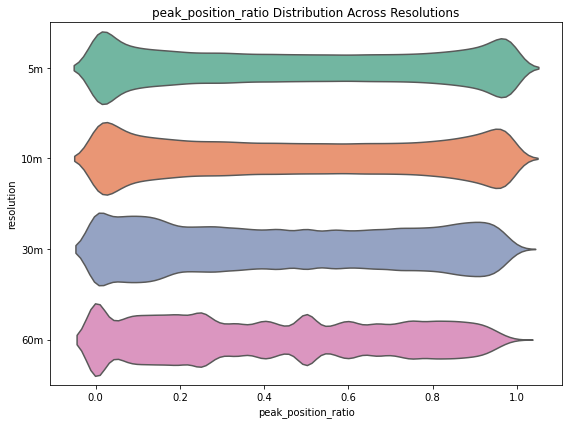

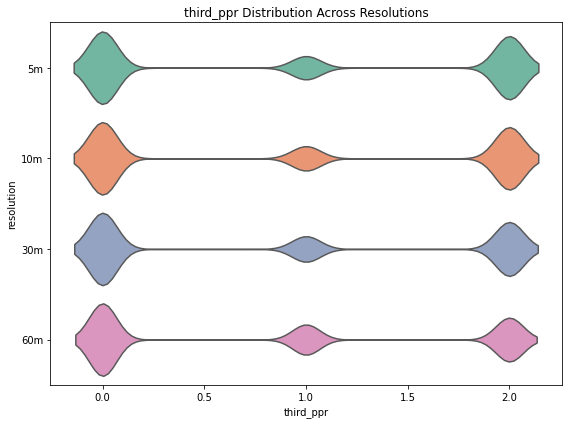

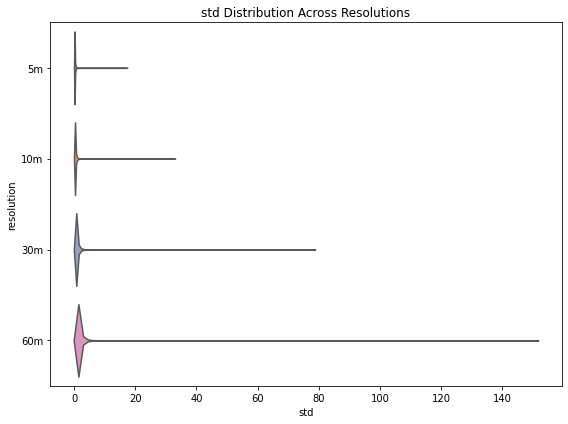

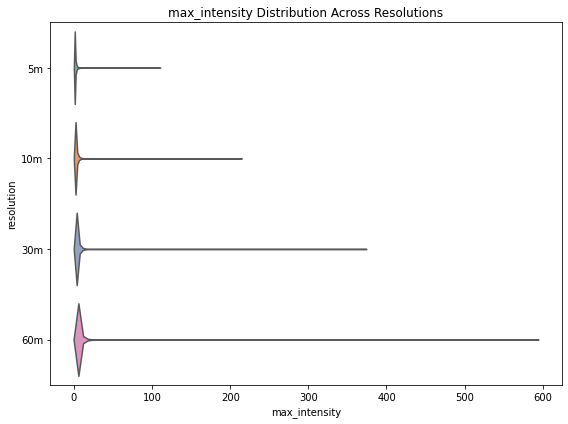

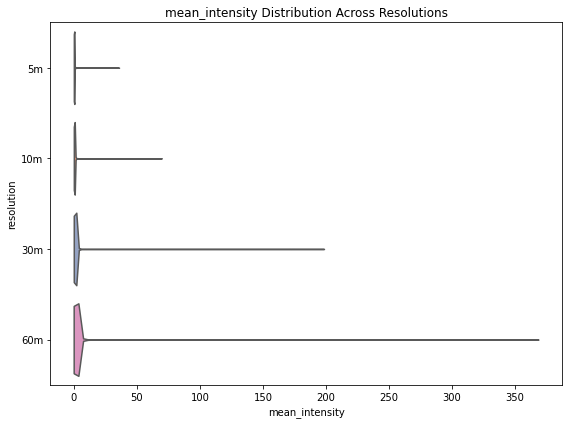

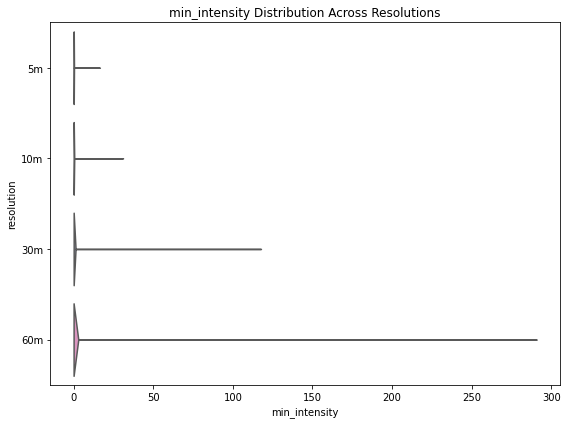

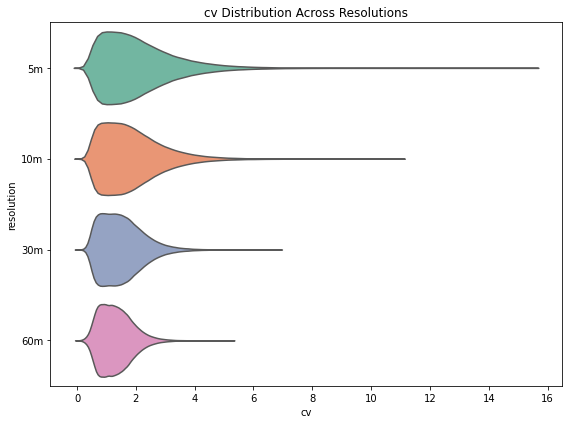

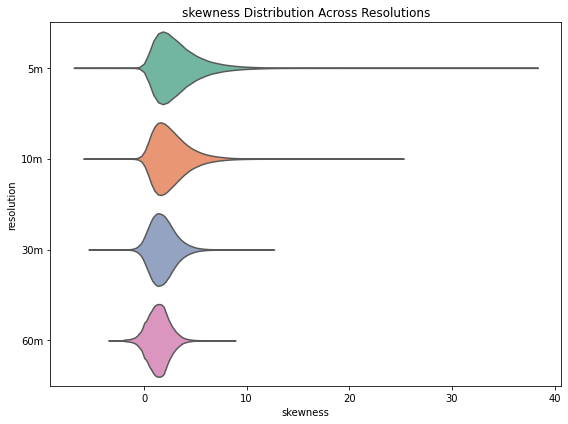

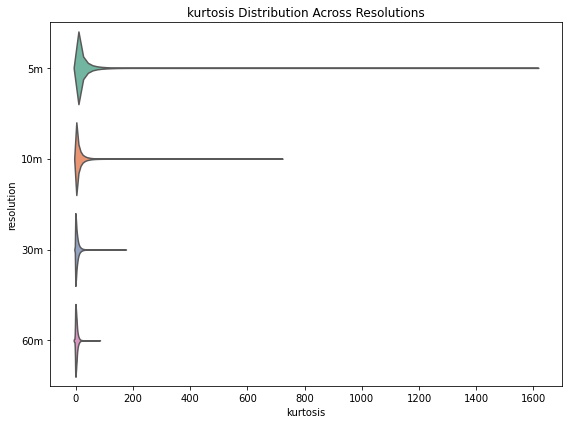

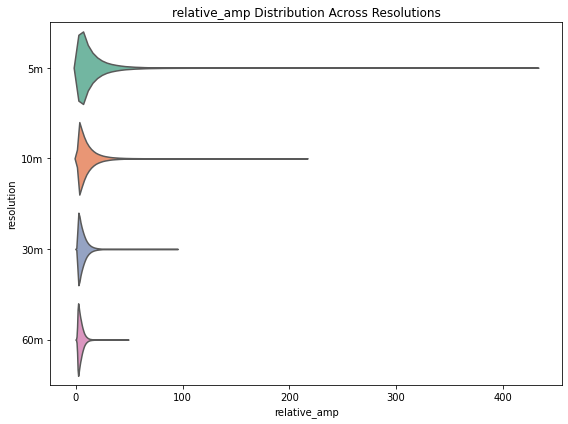

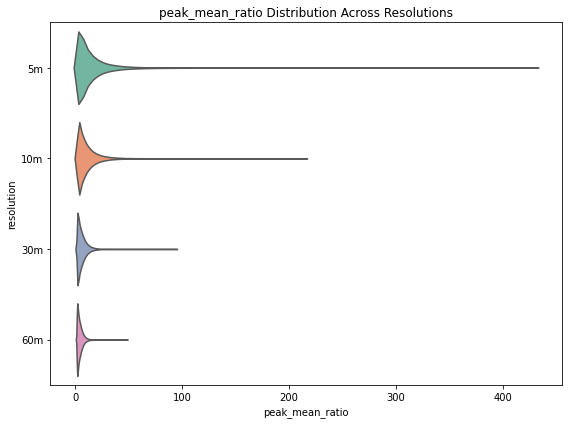

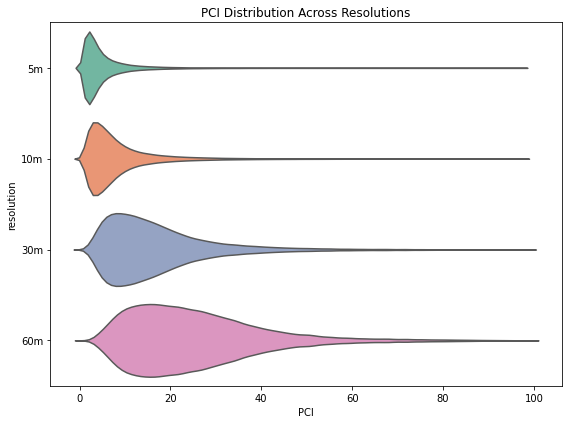

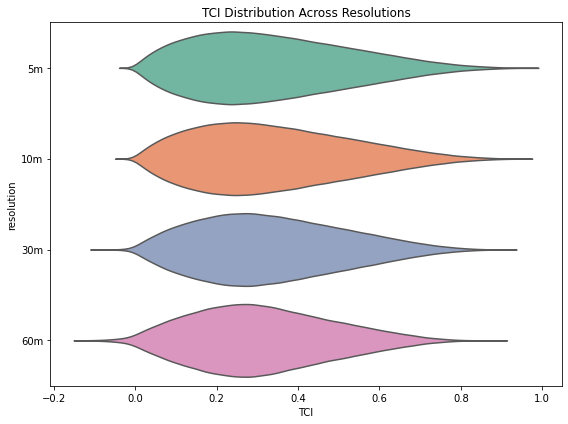

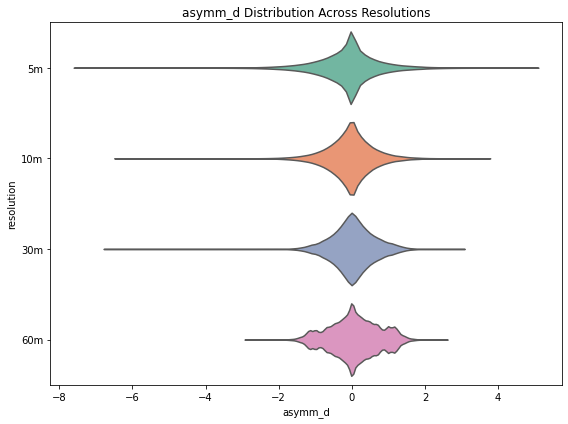

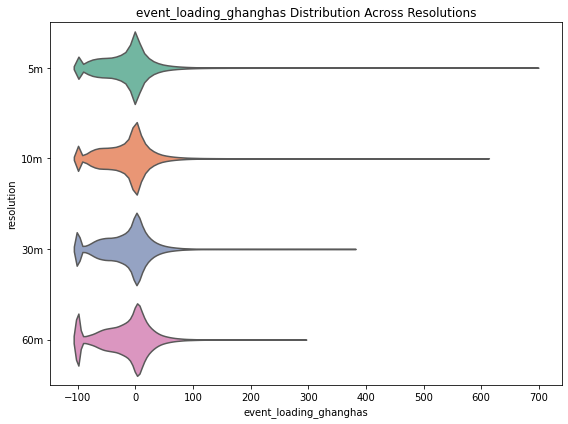

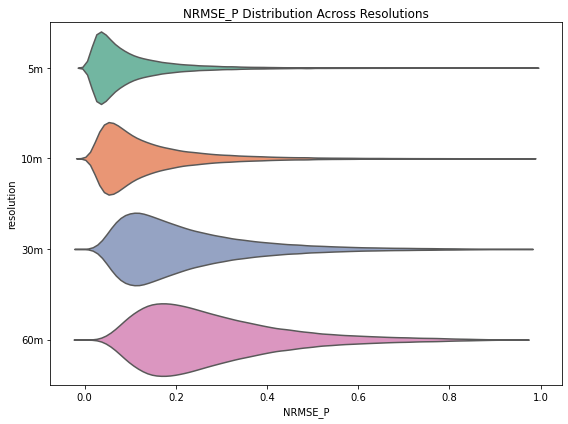

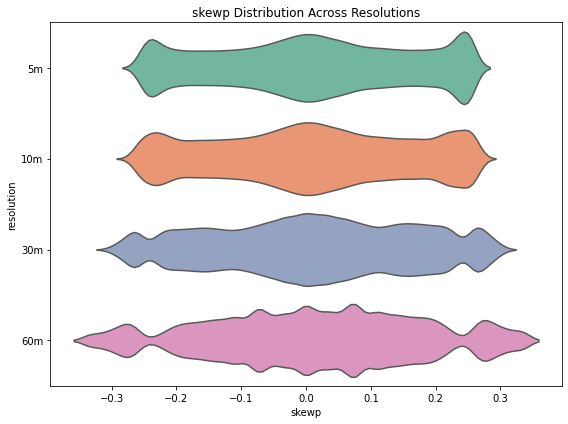

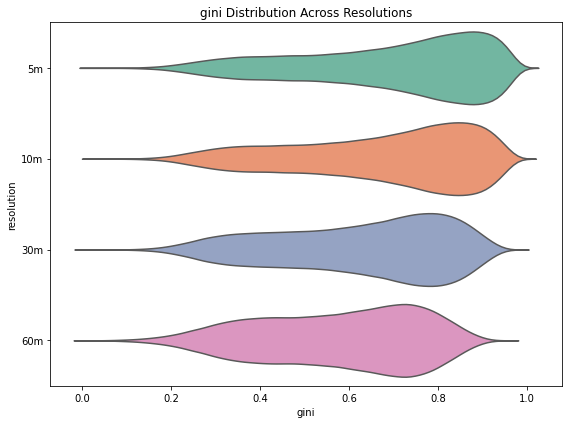

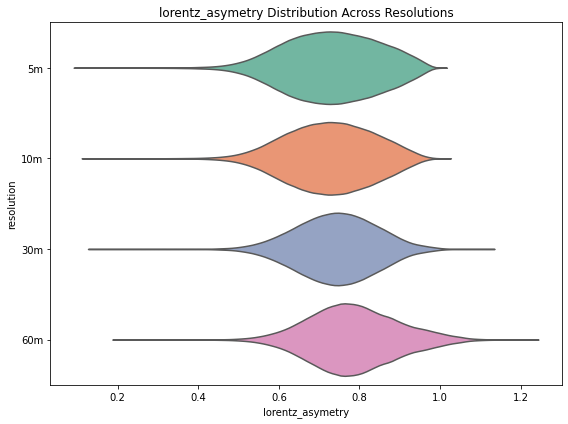

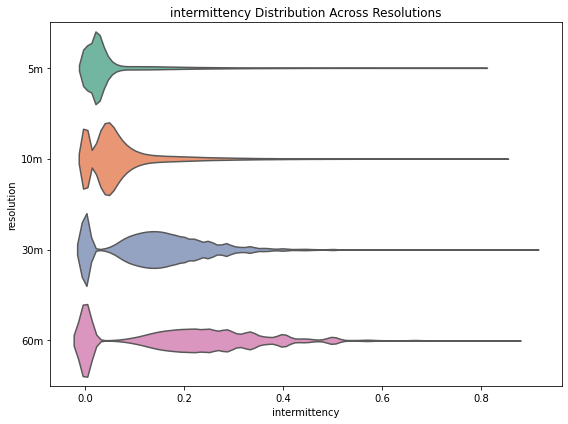

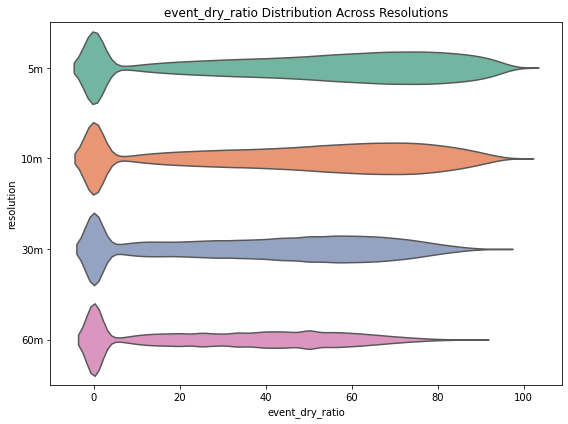

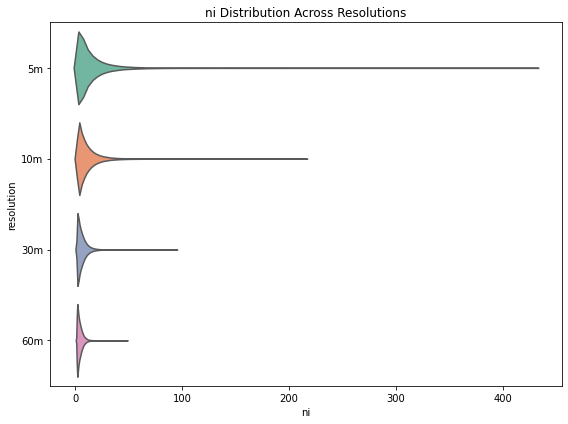

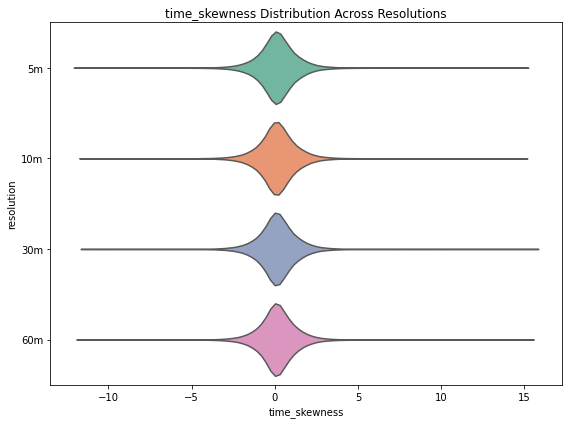

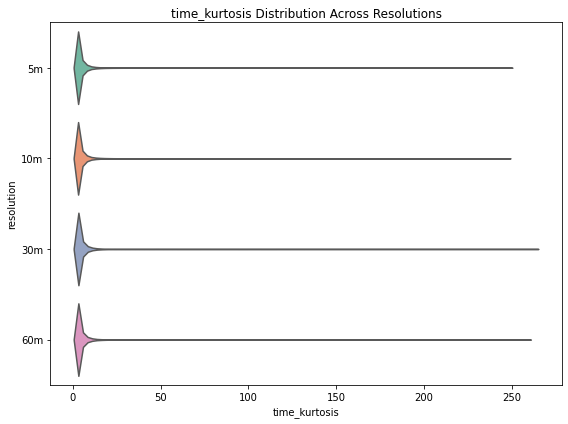

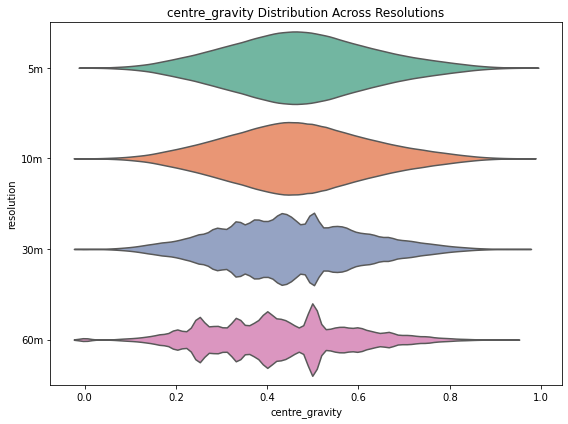

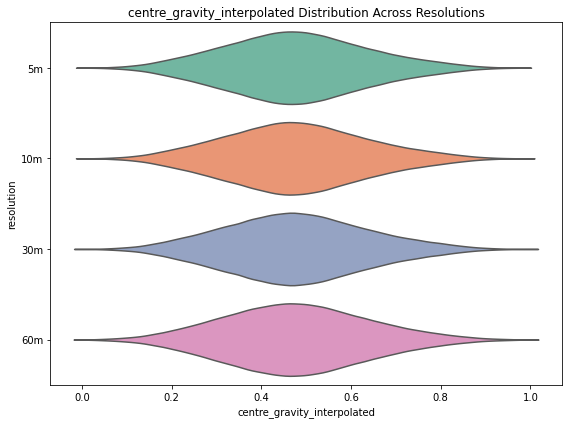

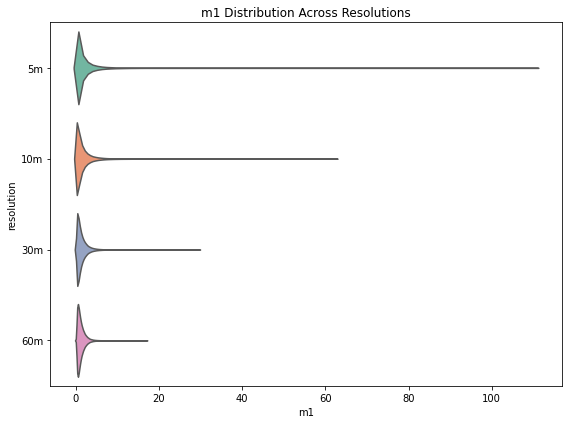

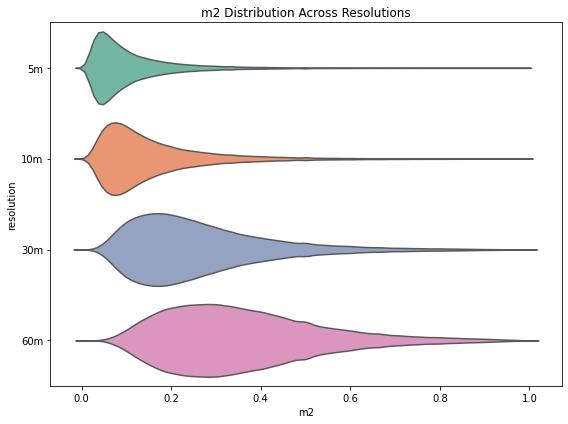

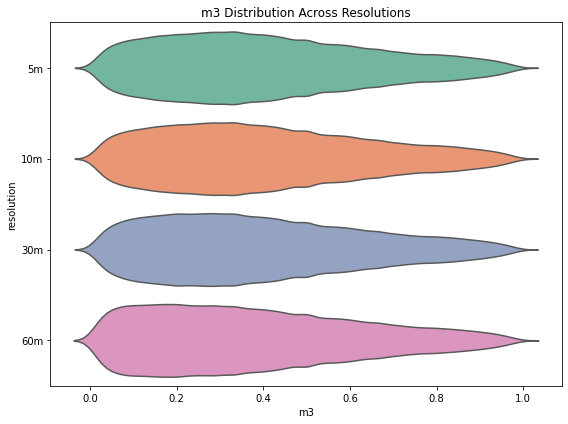

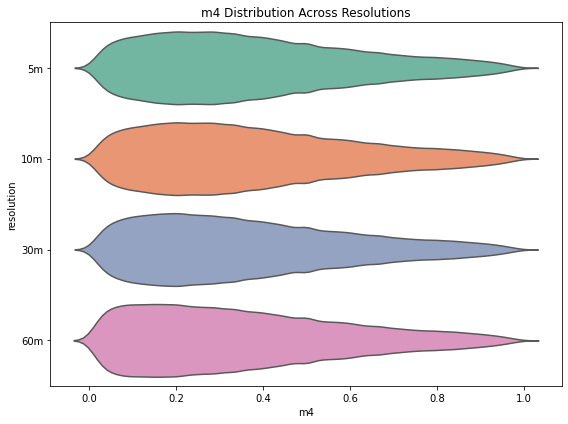

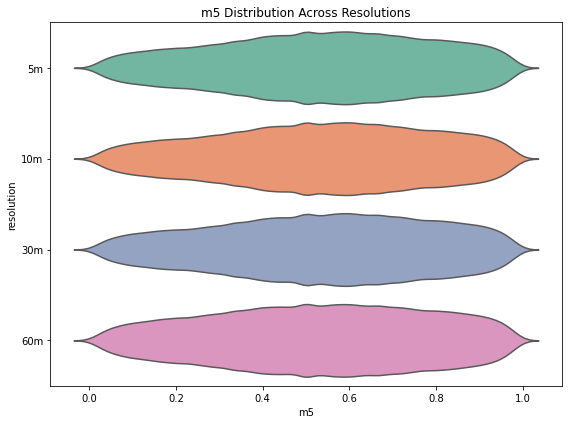

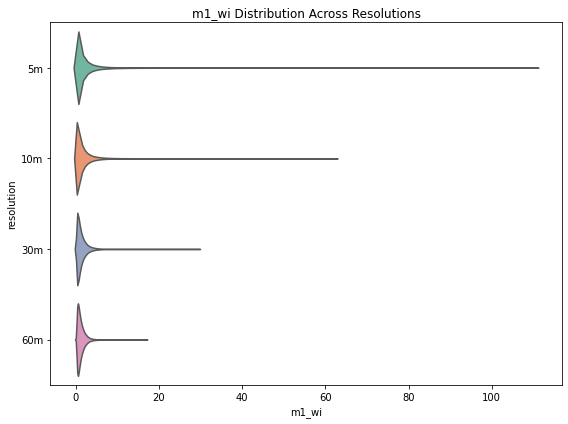

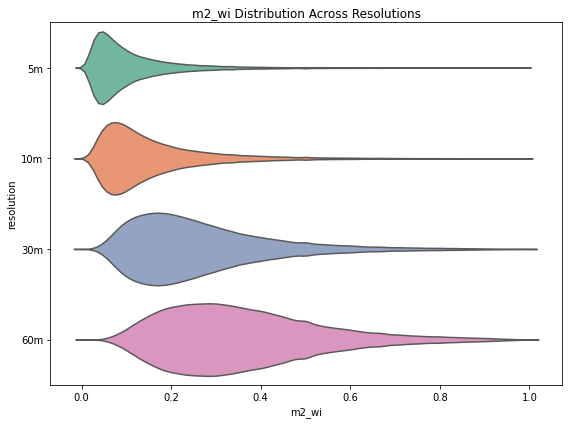

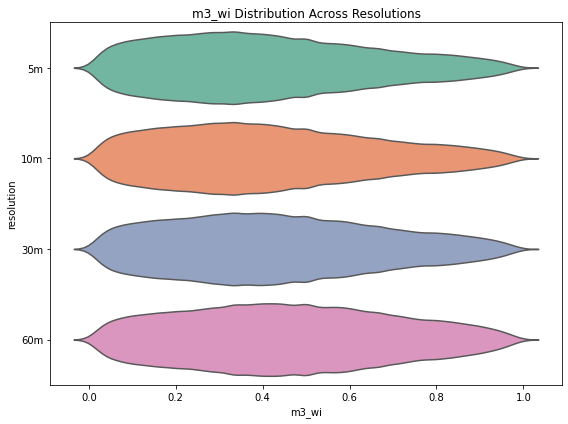

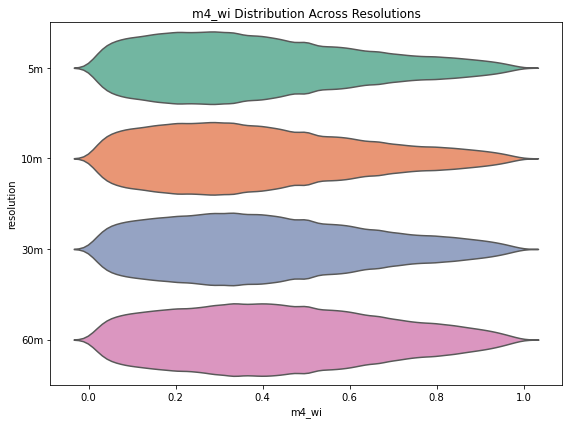

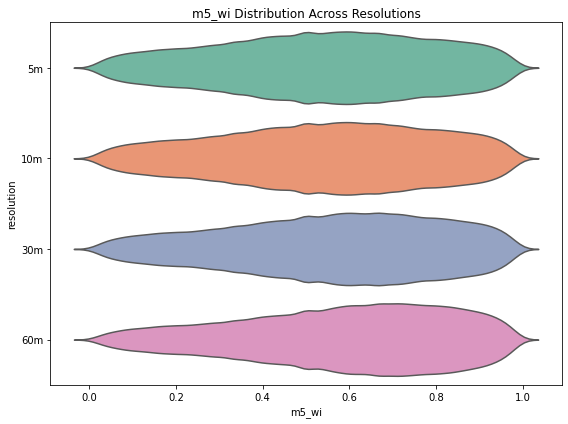

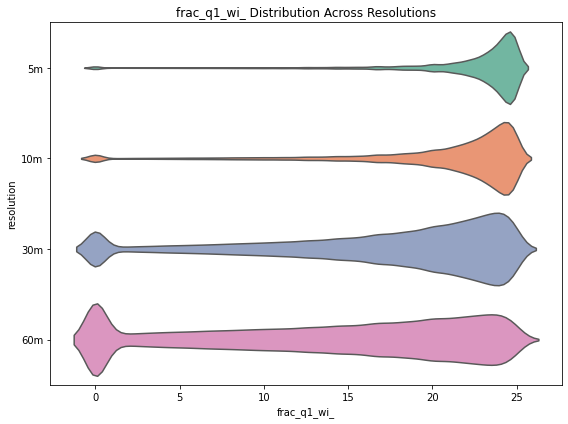

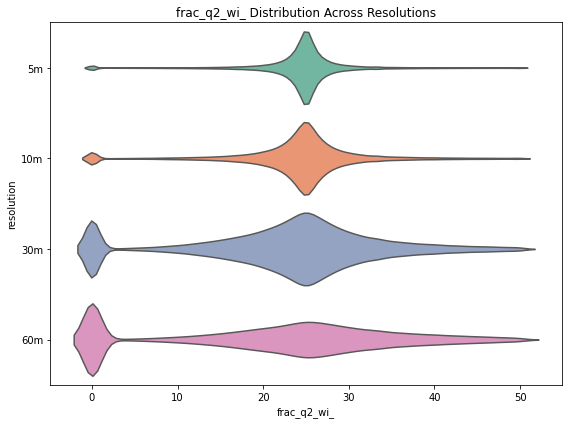

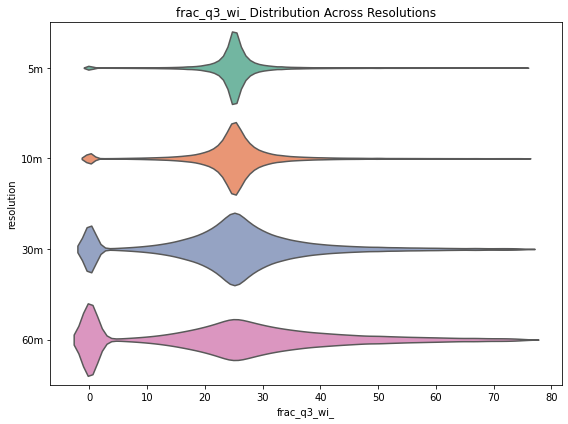

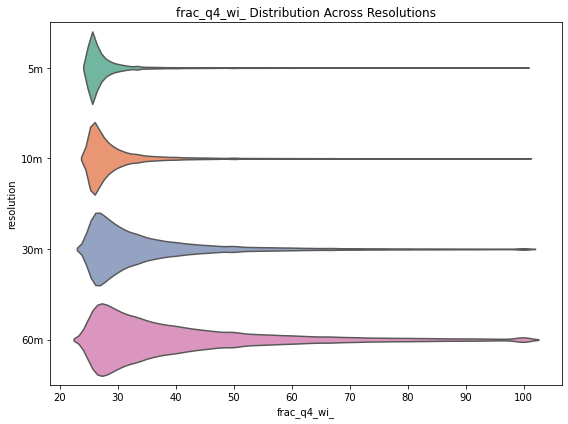

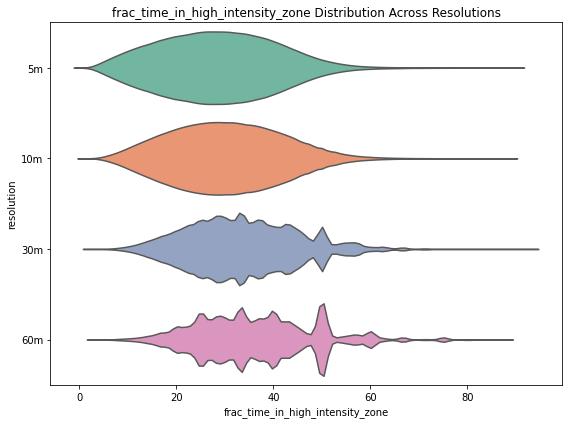

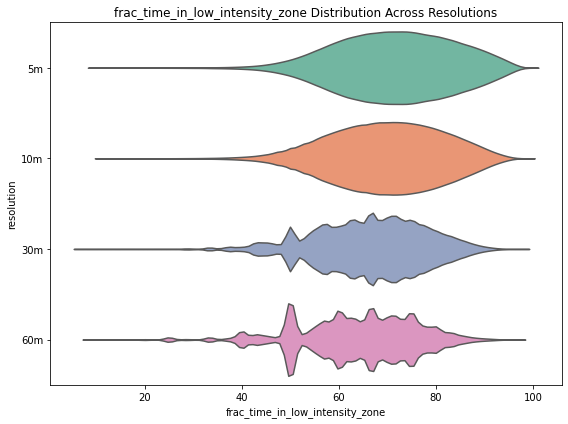

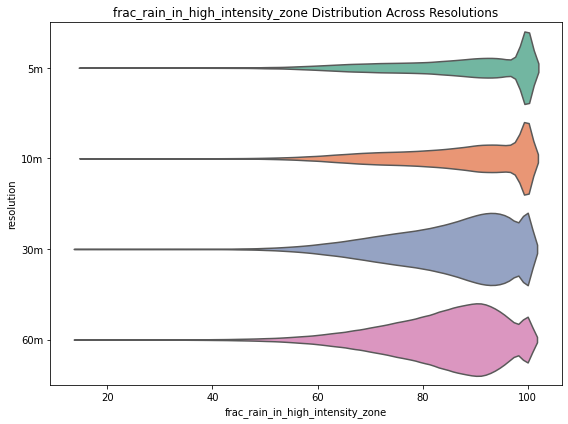

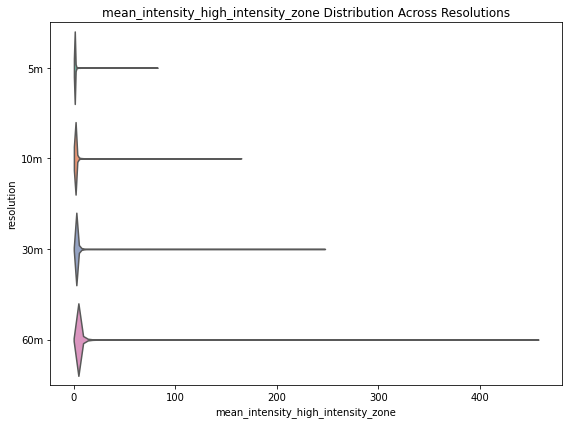

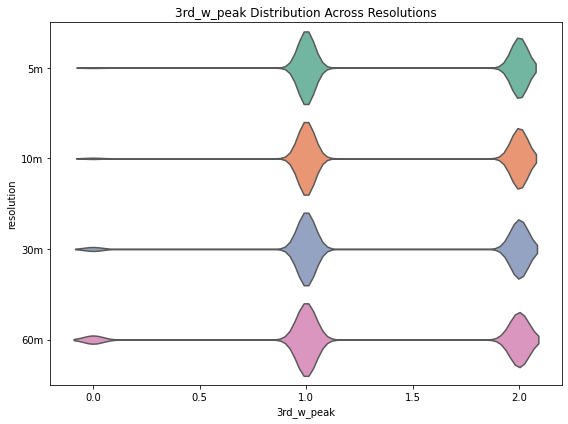

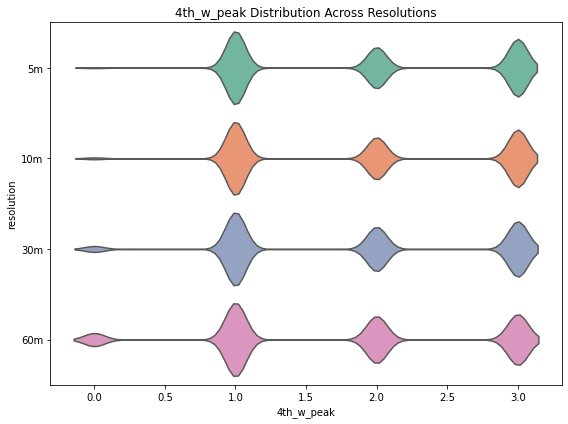

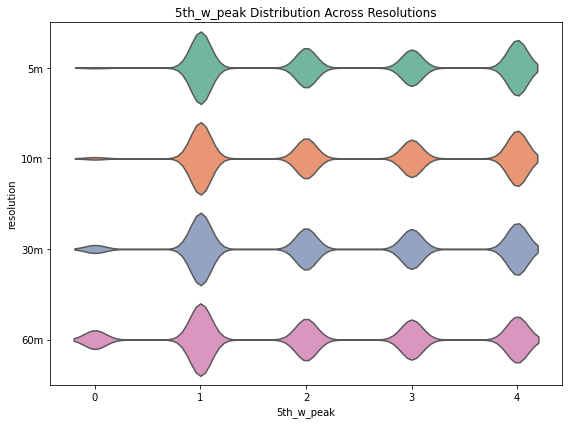

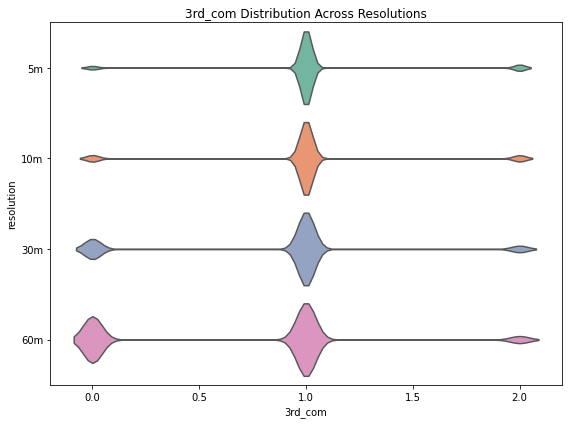

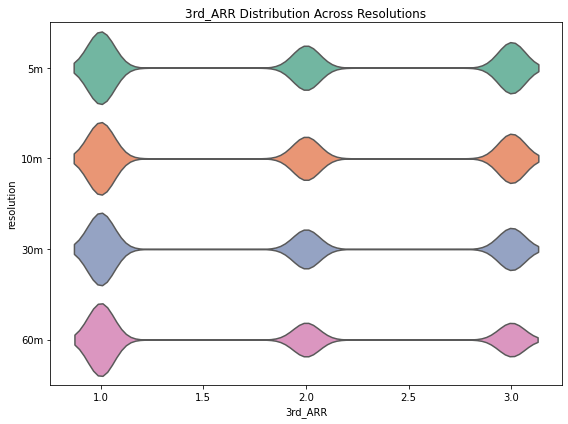

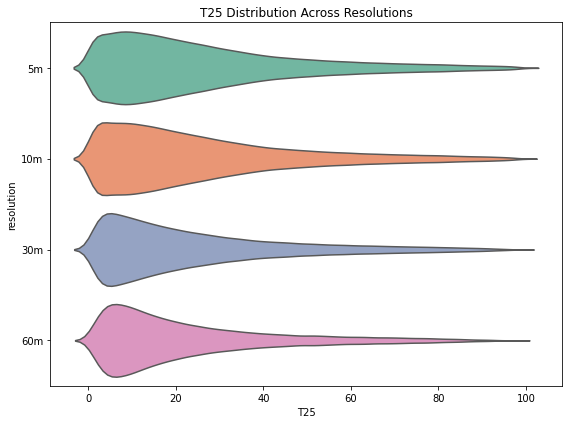

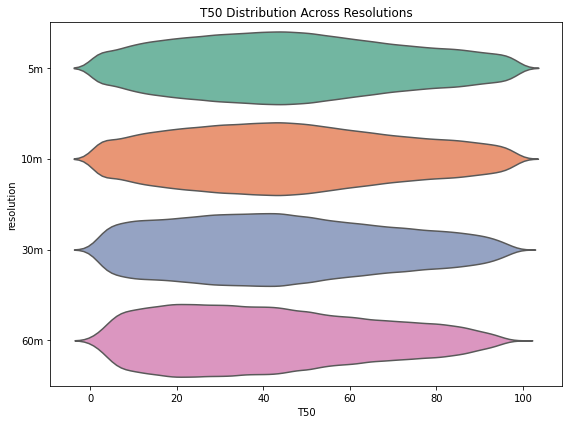

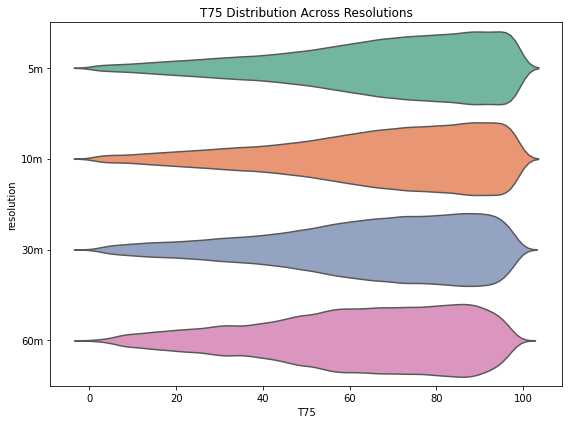

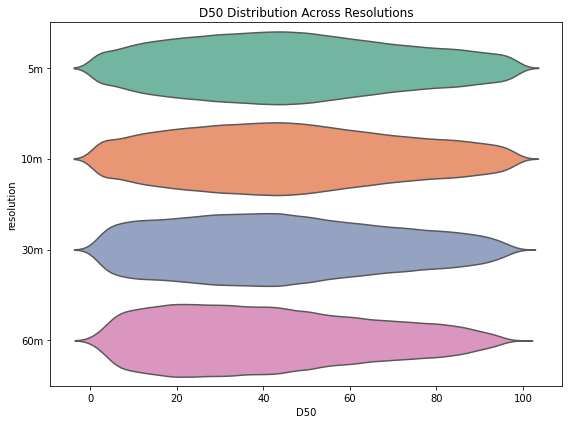

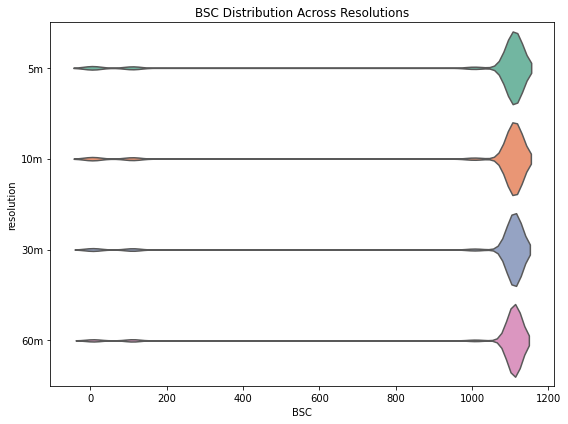

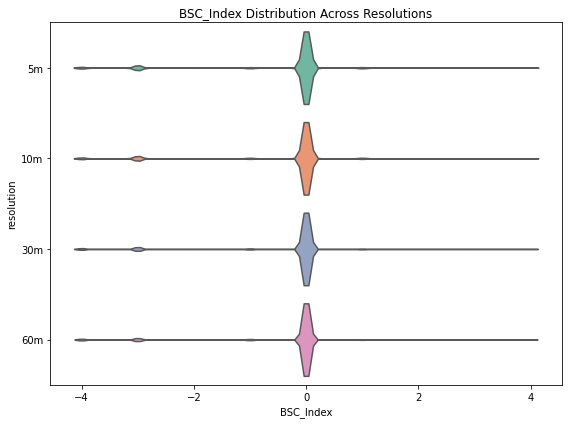

In [249]:
import seaborn as sns
import matplotlib.pyplot as plt

# Loop through each metric and create a separate ridge plot
for metric in all_events_df_5mins_raw.columns:
    plt.figure(figsize=(8, 6))
    sns.violinplot(
        data=df_long, 
        y='resolution', 
        x=metric, 
        orient='h', 
        scale='width',
        inner=None,
        palette='Set2'
    )
    plt.title(f'{metric} Distribution Across Resolutions')
    plt.tight_layout()
    plt.show()
